Import Libraries

In [22]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

Reading Data Set

In [23]:
# Read Data
credit = pd.read_csv(r'C:\Users\kylie\Documents\UT Data Analysis Course\Course Five\default of credit card clients.csv', header =1)

Analysis

In [24]:
# Check the first five rows of data set.
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [25]:
# Header of the data set.
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [26]:
# Information about the data set.
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

Variable Reduction

In [43]:
print(np.var(credit))

ID                            7.500000e+07
LIMIT_BAL                     1.683389e+10
SEX                           2.392394e-01
EDUCATION                     6.246302e-01
MARRIAGE                      2.724432e-01
AGE                           8.496692e+01
PAY_0                         1.262888e+00
PAY_2                         1.433206e+00
PAY_3                         1.432444e+00
PAY_4                         1.366840e+00
PAY_5                         1.284071e+00
PAY_6                         1.322427e+00
BILL_AMT1                     5.422059e+09
BILL_AMT2                     5.065537e+09
BILL_AMT3                     4.809177e+09
BILL_AMT4                     4.138578e+09
BILL_AMT5                     3.696171e+09
BILL_AMT6                     3.546574e+09
PAY_AMT1                      2.743331e+08
PAY_AMT2                      5.308640e+08
PAY_AMT3                      3.099948e+08
PAY_AMT4                      2.454204e+08
PAY_AMT5                      2.334188e+08
PAY_AMT6   

There is no near zero variance variables.

In [27]:
# Correlation Matrix
corrMat = credit.corr()
print(corrMat)

                                  ID  LIMIT_BAL       SEX  EDUCATION  \
ID                          1.000000   0.026179  0.018497   0.039177   
LIMIT_BAL                   0.026179   1.000000  0.024755  -0.219161   
SEX                         0.018497   0.024755  1.000000   0.014232   
EDUCATION                   0.039177  -0.219161  0.014232   1.000000   
MARRIAGE                   -0.029079  -0.108139 -0.031389  -0.143464   
AGE                         0.018678   0.144713 -0.090874   0.175061   
PAY_0                      -0.030575  -0.271214 -0.057643   0.105364   
PAY_2                      -0.011215  -0.296382 -0.070771   0.121566   
PAY_3                      -0.018494  -0.286123 -0.066096   0.114025   
PAY_4                      -0.002735  -0.267460 -0.060173   0.108793   
PAY_5                      -0.022199  -0.249411 -0.055064   0.097520   
PAY_6                      -0.020270  -0.235195 -0.044008   0.082316   
BILL_AMT1                   0.019389   0.285430 -0.033642   0.02

From correlation matirx, BILL_AMTs are highly correlated. This may cause multicollinearity problem. 
Keep BILL_AMT1. Remove BILL_AMT2 - BILL_AMT6. 

In [28]:
# Default Payments Default=1, not Default=0
credit['default payment next month'].describe()

count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default payment next month, dtype: float64

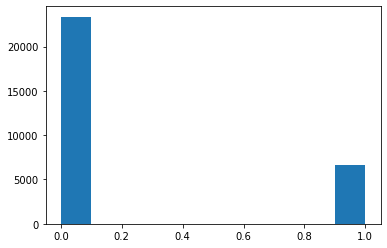

In [29]:
# Default payments histogram
plt.hist(credit['default payment next month'])
plt.show()

22.12% of customer defaulted.

This section is EDA on Demographics

In [30]:
# Demographics: Sex
credit.groupby('SEX')['SEX'].count()

SEX
1    11888
2    18112
Name: SEX, dtype: int64

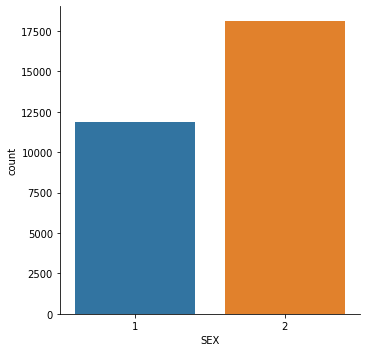

In [31]:
# Use seaborn to plot males and females count: male=1, female=2
sns.catplot('SEX', data=credit, kind='count', aspect=1.0)

In the data set, there are more female customers than male.

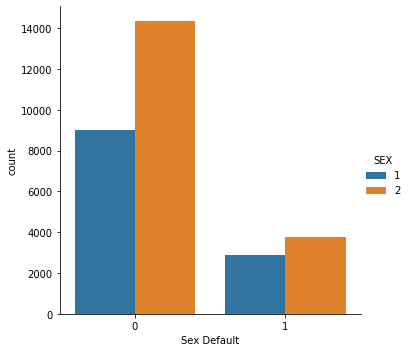

In [42]:
# Use saeborn to group by Sex and Default rate
g = sns.catplot('default payment next month', data=credit, hue='SEX', kind='count', aspect=1.0)
g.set_xlabels('Sex Default')

In the defaut payment customers, there are more female than male.

In [61]:
# Demographics: Education
education_group = credit.groupby('EDUCATION')['EDUCATION'].count()
education_percentage = education_group/30000
education_group_percentage = pd.concat([education_group, education_percentage], axis=1)
education_group_percentage.columns = ['count','percentage']
education_group_percentage

,count,percentage
EDUCATION,,
0,14,0.000467
1,10585,0.352833
2,14030,0.467667
3,4917,0.163900
4,123,0.004100
5,280,0.009333
6,51,0.001700


Most customers' education is high school and above. 
16.39% high school
46.77% university
35.28% graduate school. 

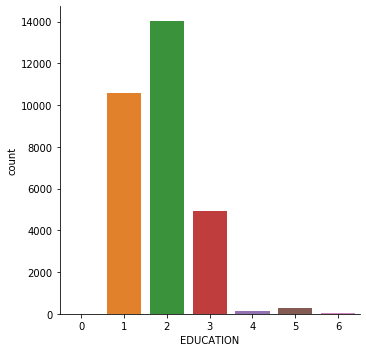

In [45]:
# Use seaborn to plot the number of each Education group
sns.catplot('EDUCATION', data=credit, kind='count', aspect=1.0)

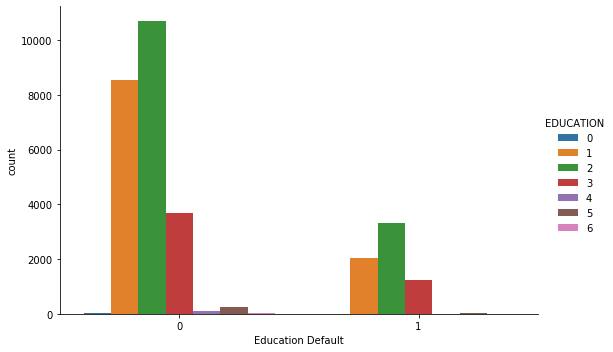

In [35]:
# Use saeborn to group by Education and Default rate
g = sns.catplot('default payment next month', data=credit, hue='EDUCATION', kind='count', aspect=1.5)
g.set_xlabels('Education Default')

The three education levels (high school, university and graduate) have more customers also have more defualt payments.

In [36]:
# Demographics: Education
credit.groupby('MARRIAGE')['MARRIAGE'].count()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

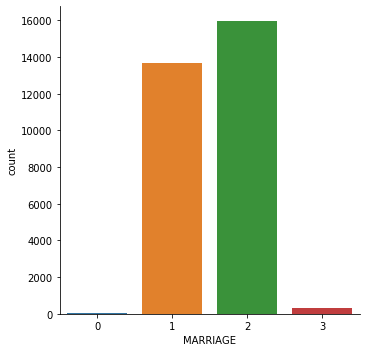

In [37]:
# Use seaborn to plot the number of each Education group
sns.catplot('MARRIAGE', data=credit, kind='count', aspect=1.0)

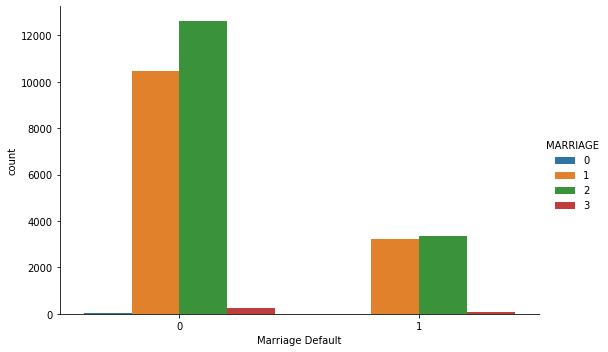

In [38]:
# Again use saeborn to group by Sex and Default rate
g = sns.catplot('default payment next month', data=credit, hue='MARRIAGE', kind='count', aspect=1.5)
g.set_xlabels('Marriage Default')

In [68]:
# Demographics: Age
print(credit['AGE'].describe())
print('Average and median amount of given credit are %0.f and %0.f, respectively'%(credit.LIMIT_BAL.mean(), 
                                                                          credit.LIMIT_BAL.median()))
print("Variance of customer set is % s" 
      %(np.var(credit['LIMIT_BAL']))) 

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64
Average and median amount of given credit are 167484 and 140000, respectively
Variance of customer set is 16833894533.632648


Customers in this data set are young to middle age.

Text(0.5, 1.0, "Distribution of Customers' Ages")

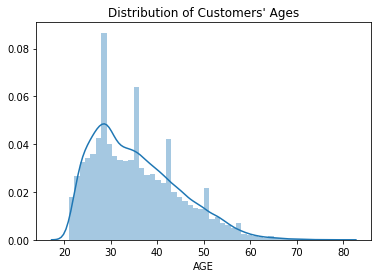

In [41]:
# Distribution of age, with an overlay of a density plot
age_dist = sns.distplot(credit['AGE'])
age_dist.set_title("Distribution of Customers' Ages")

This section is EDA on product arttributes information.

In [75]:
# Amount of given credits
print(credit['LIMIT_BAL'].describe())
print('Average and median amount of given credit are %0.f and %0.f, respectively'%(credit.LIMIT_BAL.mean(), 
                                                                          credit.LIMIT_BAL.median()))
print("Variance is % s" 
      %(np.var(credit['LIMIT_BAL']))) 

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64
Average and median amount of given credit are 167484 and 140000, respectively
Variance is 16833894533.632648


Amount of given credits mean and median are close. But variance is large meaning there are some extreme values.

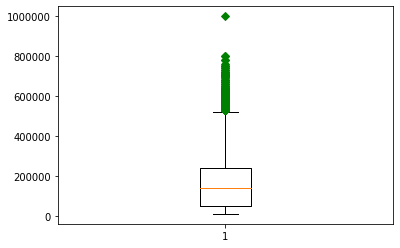

In [63]:
A = credit['LIMIT_BAL']
plt.boxplot(A,0,'gD')
plt.show()

In [64]:
# History of last payment
credit['PAY_0'].describe()

count    30000.000000
mean        -0.016700
std          1.123802
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_0, dtype: float64

In [76]:
# Bill_Amount_1
print(credit['BILL_AMT1'].describe())
print('Average and median bill amount are %0.f and %0.f, respectively'%(credit.BILL_AMT1.mean(), 
                                                                          credit.BILL_AMT1.median()))
print("Variance is % s" 
      %(np.var(credit['BILL_AMT1']))) 

count     30000.000000
mean      51223.330900
std       73635.860576
min     -165580.000000
25%        3558.750000
50%       22381.500000
75%       67091.000000
max      964511.000000
Name: BILL_AMT1, dtype: float64
Average and median bill amount are 51223 and 22382, respectively
Variance is 5422059221.366618


Median bill amount is half of average bill amount and standard deviation is large. This variable is right skewed.

Text(0.5, 1.0, 'Distribution of Bill Amount in September')

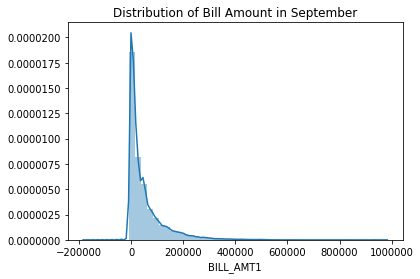

In [79]:
# Distribution of bill_amount_1, with an overlay of a density plot
bill_AMT1_dist = sns.distplot(credit['BILL_AMT1'])
bill_AMT1_dist.set_title("Distribution of Bill Amount in September")

In [77]:
# Amount of previous payment
print(credit['PAY_AMT1'].describe())

print('Average and median amount of latest previous payment are %0.f and %0.f, respectively'%(credit.PAY_AMT1.mean(), 
                                                                          credit.PAY_AMT1.median()))
print("Variance is % s" 
      %(np.var(credit['PAY_AMT1']))) 


count     30000.000000
mean       5663.580500
std       16563.280354
min           0.000000
25%        1000.000000
50%        2100.000000
75%        5006.000000
max      873552.000000
Name: PAY_AMT1, dtype: float64
Average and median amount of latest previous payment are 5664 and 2100, respectively
Variance is 274333111.3442119


Median latest previous payment is half of average and standard deviation is large. This variable is right skewed.

Text(0.5, 1.0, 'Distribution of Payment Amount in September')

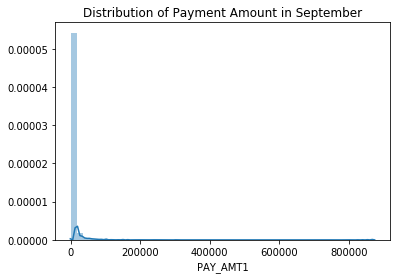

In [80]:
# Distribution of bill_amount_1, with an overlay of a density plot
bill_AMT1_dist = sns.distplot(credit['PAY_AMT1'])
bill_AMT1_dist.set_title("Distribution of Payment Amount in September")